In [1]:
import numpy as np
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt
import random
import pickle

from keras.utils import np_utils

Using TensorFlow backend.


# Import & Prepare data

In [2]:
train_dir = "../input/oct2017/OCT2017 /train"
validation_dir = "../input/oct2017/OCT2017 /val"
test_dir = "../input/oct2017/OCT2017 /test"

CATEGORIES = ["DME","CNV","NORMAL","DRUSEN"]
IMG_SIZE = 50

### Sample image

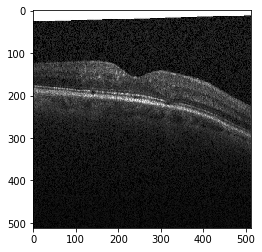

In [3]:
# from TRAIN data
for category in CATEGORIES:
    path = os.path.join(train_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

### Sample resized image

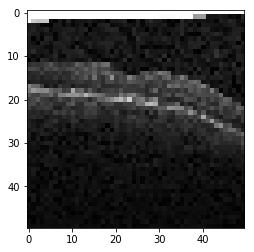

In [4]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [5]:
print(new_array)

[[255 255 255 ... 255 255 255]
 [255 255 255 ...  13   5  38]
 [249 204 196 ...  32  14  27]
 ...
 [  2   3   9 ...  18  15   4]
 [ 13   2  13 ...  15   3   7]
 [ 15  13  15 ...   3   6   3]]


### Get all images & resize them

In [6]:
training_data = []
validation_data = []
test_data = []

def get_data(dataset_path):
    data_array = []
    for category in CATEGORIES:
        path = os.path.join(dataset_path, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data_array.append([new_array, class_num])
            except Exception as e:
                pass
    return data_array

training_data = get_data(train_dir)
validation_data = get_data(validation_dir)
test_data = get_data(test_dir)

In [7]:
print("training data length: ", len(training_data))
print("validation data length: ", len(validation_data))
print("testing data length: ", len(test_data))

training data length:  83484
validation data length:  32
testing data length:  968


In [8]:
# schuffle training data
random.shuffle(training_data)

for sample in training_data[:5]:
    print(sample[0])

[[255  35  42 ...  41  14  21]
 [254  27  36 ...  25   1   8]
 [254  29  32 ...  24  14  21]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[43  4  6 ...  4 15  2]
 [37 27 22 ... 29 25 12]
 [41  2 42 ... 38  8 13]
 ...
 [12 11 22 ...  0 11  4]
 [13 15  2 ... 10  1  9]
 [ 3  0  2 ... 13  7  2]]
[[ 7  7  4 ...  3 27  0]
 [37 27  8 ... 32  5  0]
 [ 9  2 29 ...  4  3  0]
 ...
 [ 5  2 13 ...  5 12  0]
 [ 8  9 12 ... 13  3  0]
 [14  3  0 ... 18 10  0]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [ 19  14  15 ...  17   8   5]
 [  6   7   7 ...   9  18  10]
 [ 13  14   6 ...  12  13   9]]
[[255 255 255 ...  59  26  40]
 [140 158  39 ...  63  54  48]
 [ 51   8  38 ...  58  21  34]
 ...
 [  9   3  25 ...  23  23   7]
 [ 17  21  18 ...  17  17 142]
 [ 16  19  20 ... 255 255 255]]


In [9]:
x_train = []
y_train = []

x_test = []
y_test = []

# split data to x and y
for features, label in training_data:
    x_train.append(features)
    y_train.append(label)
    
for features, label in test_data:
    x_test.append(features)
    y_test.append(label)
    
print(x_train[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

# all samples should have the same size
x_train = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[255]
   [ 35]
   [ 42]
   ...
   [ 41]
   [ 14]
   [ 21]]

  [[254]
   [ 27]
   [ 36]
   ...
   [ 25]
   [  1]
   [  8]]

  [[254]
   [ 29]
   [ 32]
   ...
   [ 24]
   [ 14]
   [ 21]]

  ...

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]]]


# Pickle & unpickle data

In [10]:
pickle_out = open("x_train.pickle", "wb")
pickle.dump(x_train, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("x_test.pickle", "wb")
pickle.dump(x_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [11]:
def load_dataset():
    pickle_in = open("x_train.pickle", "rb")
    x_train = pickle.load(pickle_in)

    pickle_in = open("y_train.pickle", "rb")
    y_train = pickle.load(pickle_in)

    pickle_in = open("x_test.pickle", "rb")
    x_test = pickle.load(pickle_in)

    pickle_in = open("y_test.pickle", "rb")
    y_test = pickle.load(pickle_in)
    
    # one hot encoding
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    
    return x_train, y_train, x_test, y_test

def scale_pixels(train, test):
    # convert: integers -> float32
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    
    # return normalized images
    return train_norm, test_norm

# Training helper functions

In [13]:
def show_summary(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['acc'], color='blue', label='train')
    plt.plot(history.history['val_acc'], color='orange', label='test')
    
def run_test(mod, iterations = None):
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    
    # scale pixels
    trainX, testX = scale_pixels(trainX, testX)
    
    if iterations is None:
        iterations = 100
    
    # fit model
    history = mod.fit(trainX, trainY, 
                        epochs = iterations, 
                        batch_size = 64, 
                        validation_data = (testX, testY), 
                        verbose = 1)

    # evaluate model
    _, acc = mod.evaluate(testX, testY, verbose = 0)

    # print accuracy
    print('Accuracy (on testing set): > %.3f' % (acc * 100.0))
    
    # return history
    return history

# CNN model

In [ ]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.layers import BatchNormalization

# define cnn model
def define_model_v3_dropout_normalization():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(50, 50, 1)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = define_model_v3_dropout_normalization()

# run test
history = run_test(model, 400)

Train on 83484 samples, validate on 968 samples
Epoch 1/400
83484/83484 [==============================] - 25s 294us/step - loss: 0.9227 - acc: 0.6616 - val_loss: 1.2769 - val_acc: 0.5155
Epoch 2/400
83484/83484 [==============================] - 21s 251us/step - loss: 0.6474 - acc: 0.7611 - val_loss: 0.7344 - val_acc: 0.6911
Epoch 3/400
83484/83484 [==============================] - 21s 250us/step - loss: 0.5817 - acc: 0.7871 - val_loss: 0.7919 - val_acc: 0.6787
Epoch 4/400
83484/83484 [==============================] - 21s 251us/step - loss: 0.5339 - acc: 0.8043 - val_loss: 0.5834 - val_acc: 0.7552
Epoch 5/400
83484/83484 [==============================] - 21s 250us/step - loss: 0.4996 - acc: 0.8177 - val_loss: 0.3951 - val_acc: 0.8512
Epoch 6/400
83484/83484 [==============================] - 21s 250us/step - loss: 0.4698 - acc: 0.8291 - val_loss: 0.3722 - val_acc: 0.8450
Epoch 7/400
83484/83484 [==============================] - 21s 250us/step - loss: 0.4451 - acc: 0.8383 - val_los

Epoch 59/400
83484/83484 [==============================] - 21s 249us/step - loss: 0.2207 - acc: 0.9219 - val_loss: 0.0747 - val_acc: 0.9762
Epoch 60/400
83484/83484 [==============================] - 21s 250us/step - loss: 0.2209 - acc: 0.9227 - val_loss: 0.0679 - val_acc: 0.9773
Epoch 61/400
83484/83484 [==============================] - 21s 249us/step - loss: 0.2181 - acc: 0.9229 - val_loss: 0.1097 - val_acc: 0.9587
Epoch 62/400
83484/83484 [==============================] - 21s 250us/step - loss: 0.2159 - acc: 0.9239 - val_loss: 0.0642 - val_acc: 0.9752
Epoch 63/400
83484/83484 [==============================] - 21s 249us/step - loss: 0.2134 - acc: 0.9251 - val_loss: 0.1066 - val_acc: 0.9576
Epoch 64/400
83484/83484 [==============================] - 21s 248us/step - loss: 0.2155 - acc: 0.9235 - val_loss: 0.0991 - val_acc: 0.9669
Epoch 65/400
83484/83484 [==============================] - 21s 249us/step - loss: 0.2113 - acc: 0.9265 - val_loss: 0.0752 - val_acc: 0.9731
Epoch 66/400
